In [1]:
# the following line just makes the cells appear wider:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# 0.) Instructions:

The code below provides python code for different post-processing spin prescriptions that can be applied to COMPAS or other population synthesis data. 

The script contains the spin class with the different spin prescriptions, 
several examples of how to run & plot the code and apply the spins to COMPAS data, 
and examples that test spin prescriptions with generated values 

To apply this example to COMPAS data and follow the exact same steps, please download the `Z_0.001.zip` file (2GB) from https://zenodo.org/record/6346444 

 - note that at the bottom of this jupyter notebook there is also instructions how to adapt this class to older COMPAS data (from before COMPAS's public release). 



# 1.) the Spin class 

the spin class, and all its functions is provided in the Python file in this directory called `spin_class.py` we can load in the class and all its functions using the following lines/

In [2]:
import sys
from spin_class import * 



# 2.) Some Plotting code 

In [3]:

# some plotting code, it should be fairly straightforward what the code does


def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True, ):
    """
    Some code to do the layout for axes in matplotlib in a nice way 
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')


    if labelSizeMajor==10:
        ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
        ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    else:
        ax.set_xlabel(nameX, fontsize=labelSizeMajor,labelpad=labelpad)#,fontweight='bold')
        ax.set_ylabel(nameY, fontsize=labelSizeMajor,labelpad=labelpad)#, fontweight='bold')  

    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax



def plot_scatter_spin(spin_values, spin_model_name):
    """
    Creates scatter plot to compare pre-second-SN properties (WR mass, Period), and final BH spin
    Can be used to compare to plots shown in Bavera et al. (2021); https://arxiv.org/abs/2105.09077
    """
    
    f, ax= plt.subplots(ncols=1,nrows=1, figsize=(8,5))

    plt.scatter(spin.mWR[0:100000], spin.PeriodPreSN2[0:100000],  c=spin_values[0:100000])

    ylabel=r'Period [day]'
    xlabel=r'$m_{\rm{WR}} \, [M_{\odot}]$ '

    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, 70)
    plt.ylim(0.05, 10)

    cbar = plt.colorbar()
    cbar.set_label('spin', fontsize=20)
    cbar.ax.tick_params(labelsize='large')

    plt.title('spin' + spin_model_name)
    layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel,setMinor=False, fontsize=16)
    f.tight_layout() 
    # plt.savefig('./BBH_COMPAS_model_A.png', dpi=600)#,\
    plt.show()


    
    
def plot_scatter_Belczynski_spin(spin_values, spin_model_name):
    """
    Creates plot that shows the spin values versus the CO core mass to compare to Fig 1. in Belczynski et al. (2020)
    https://www.aanda.org/10.1051/0004-6361/201936528 
    """

    f, ax= plt.subplots(ncols=1,nrows=1, figsize=(8,5))

    plt.scatter(spin.MassCOM1CoreSN[0:], spin_values[0:],  c=np.log10(spin.metallicitySystems[0:]))



    ylabel=r'spin m1 '
    xlabel=r'$m_{\rm{CO}} \, [M_{\odot}]$ '

#     plt.xscale('log')
#     plt.yscale('log')
    plt.xlim(0, 70)
#     plt.ylim(0.0, 1)

    cbar = plt.colorbar()
    cbar.set_label(r'$Z$', fontsize=20)
    cbar.ax.tick_params(labelsize='large')

    plt.title('spin' + spin_model_name)
    layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel,setMinor=False, fontsize=16)
    f.tight_layout() 
    # plt.savefig('./BBH_COMPAS_model_A.png', dpi=600)# uncomment if you want to save the figure 
    plt.show()
    


def plot_histogram_spin(spin_values, spin_model_name, weights=None, yscaleLOG=False):
    """
    Creates weighted histogram of black hole spins (spin_values)
    """

    f, ax= plt.subplots(ncols=1,nrows=1, figsize=(8,5))

    plt.hist(spin_values, weights=weights, bins=100)

    ylabel=r'PDF (rate) ' 
    xlabel=r'spin '

    plt.xlim(0, 1)
    
    if yscaleLOG==True:
        ax.set_yscale('log')

    plt.title('spin' + spin_model_name)
    layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel,setMinor=False, fontsize=16)
    f.tight_layout() 
    # plt.savefig('./BBH_COMPAS_model_A.png', dpi=600)#,\
    plt.show()



    
    
    
def plot_scatter_general(xx, yy, cc, spin_model_name, ylabel=r'Period [day]', xlabel=r'$m_{\rm{WR}} \, [M_{\odot}]$ '):




    f, ax= plt.subplots(ncols=1,nrows=1, figsize=(8,5))

    plt.scatter(xx[0:100000], yy[0:100000],  c=cc[0:100000])




#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlim(1, 70)
#     plt.ylim(0.05, 10)

    cbar = plt.colorbar()
    cbar.set_label('spin', fontsize=20)
    cbar.ax.tick_params(labelsize='large')

    plt.title('spin' + spin_model_name)
    layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel,setMinor=False, fontsize=16)
    f.tight_layout() 
    # plt.savefig('./BBH_COMPAS_model_A.png', dpi=600)#,\
    plt.show()
    
    
    

# 3.) Some Examples 

## Example 1: random uniform spin for each Black Hole (BH)

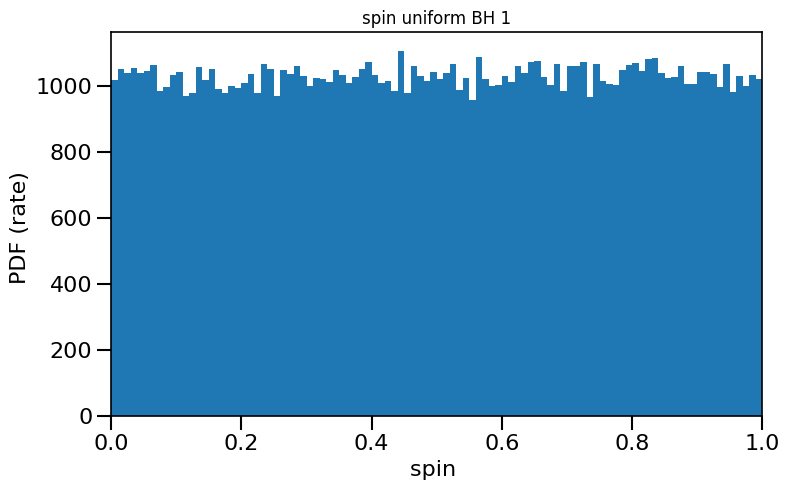

In [4]:
path = '/Volumes/Andromeda2/Z_0.001/COMPAS_Output.h5' # change this line! 

spin = calculate_spin(data_path=path)
spinM1, spinM2  = spin.random_uniform_spin(low=0.0,high=1)

fdata = h5.File(path)
plot_histogram_spin(spin_values=(spinM1), spin_model_name=' uniform BH 1')




## Example 2: all BH spin have a fixed value

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


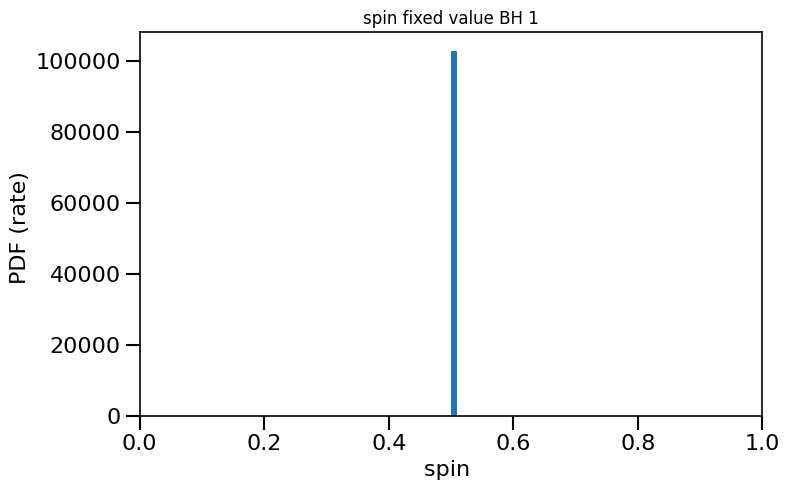

In [5]:
path = '/Volumes/Andromeda2/Z_0.001/COMPAS_Output.h5' # change this line! 

spinM1, spinM2  = spin.fixed_value_spin(spin_value=0.5)
print(spinM1)

plot_histogram_spin(spin_values=(spinM1), spin_model_name=' fixed value BH 1')


## Example 3: second formed black hole obtains spin through tides at Wolf-Rayet (WR)-BH stage 
Often described as "Bavera+21 prescription" or "Efficient core-envelope coupling presciption", or "Fuller" model

In [6]:
path = '/Volumes/Andromeda2/Z_0.001/COMPAS_Output.h5' # change this line to your output data! 
spin = calculate_spin(data_path=path)
spinM1, spinM2  = spin.Bavera21()



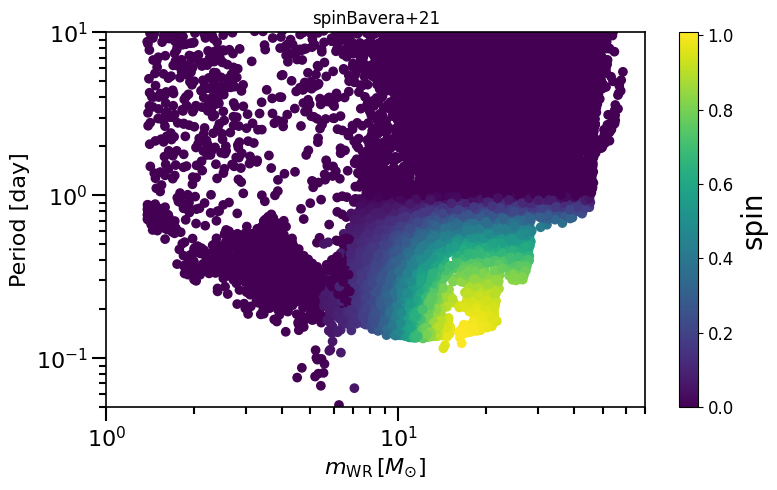

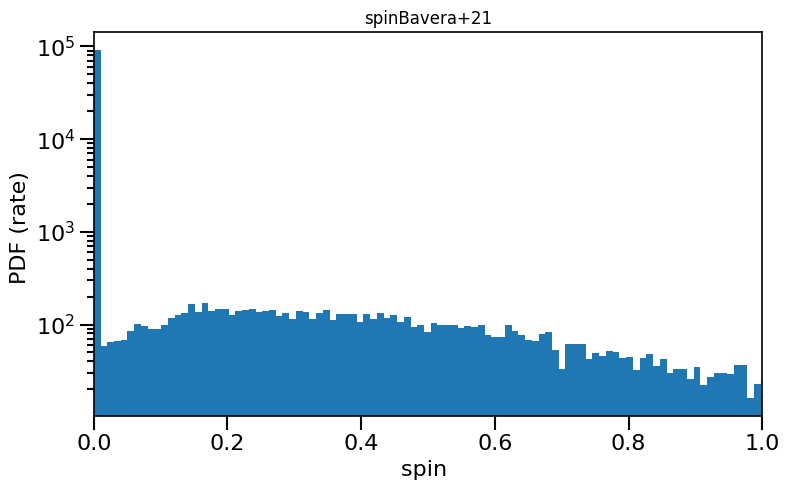

In [7]:

# note that we are plotting both the spinM2 and spinM1, spinM1 can only be nonzero if it went supernova second (due to rejuvenation). This almost never occurs. 
# plot figure showing pre-SN properties 
plot_scatter_spin(spin_values=(spinM1+spinM2), spin_model_name='Bavera+21')

# plot histogram
plot_histogram_spin(spin_values=(spinM1+spinM2), spin_model_name='Bavera+21', yscaleLOG=True)



## Example 4: Geneva model based spin (birth BH spin)
based on Belczynski et al. (2020) Fig.1 and Equation 3.

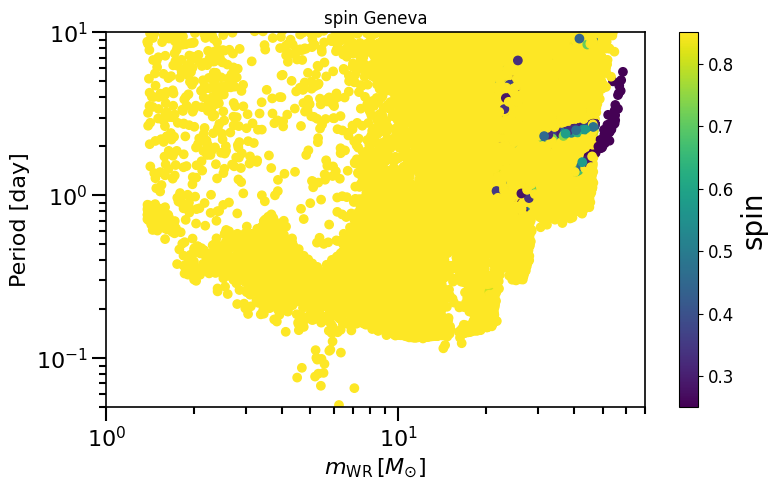

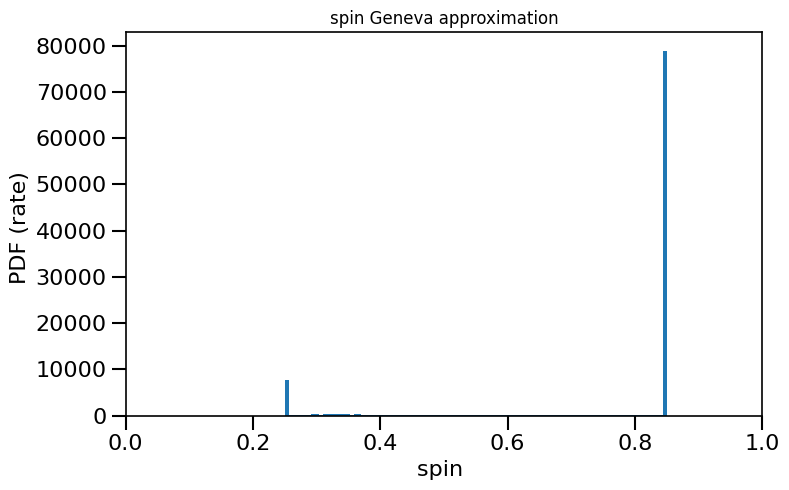

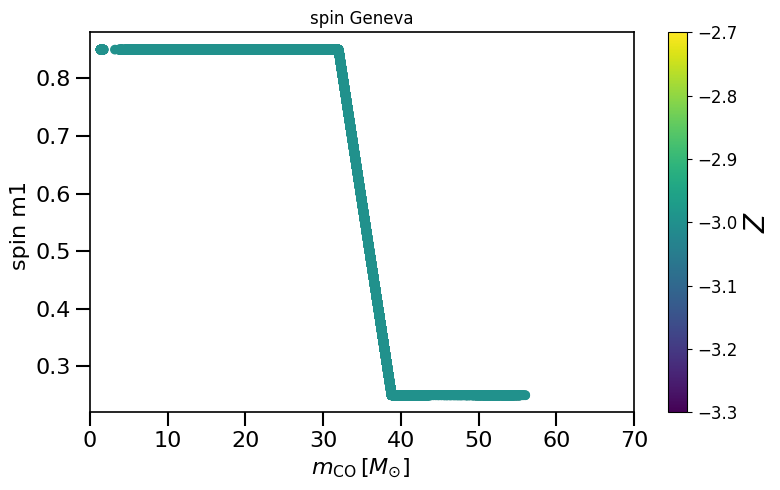

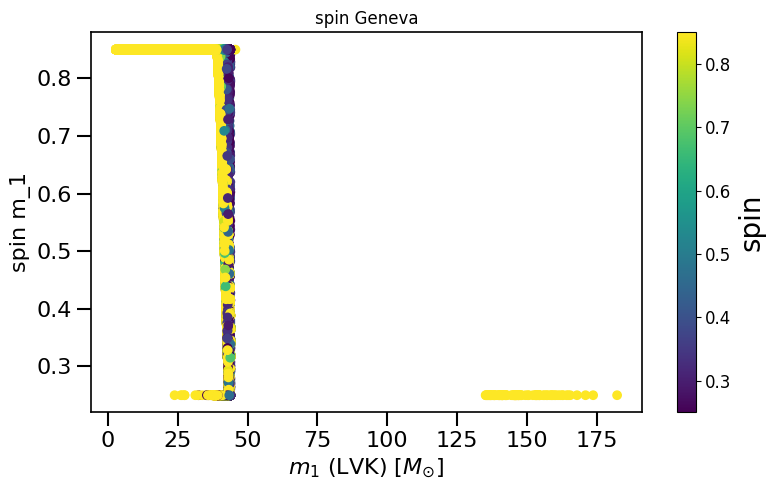

In [8]:
spin = calculate_spin(data_path=path)
spinM1, spinM2  = spin.Geneva()


plot_scatter_spin(spin_values=(spinM1), spin_model_name=' Geneva')

plot_histogram_spin(spin_values=(spinM1), spin_model_name=' Geneva approximation')


plot_scatter_Belczynski_spin(spin_values=(spinM1), spin_model_name=' Geneva')



LVKM1 = np.maximum(spin.M1, spin.M2)
plot_scatter_general(xx=LVKM1, yy=spinM1, cc=spinM2, spin_model_name=' Geneva', xlabel=r'$m_1$ (LVK) $[M_{\odot}]$', ylabel='spin m_1')



## Example 5:  MESA-model based birth BH spin 
based on Belczynski et al. (2020) Fig.2 and Equation 4.

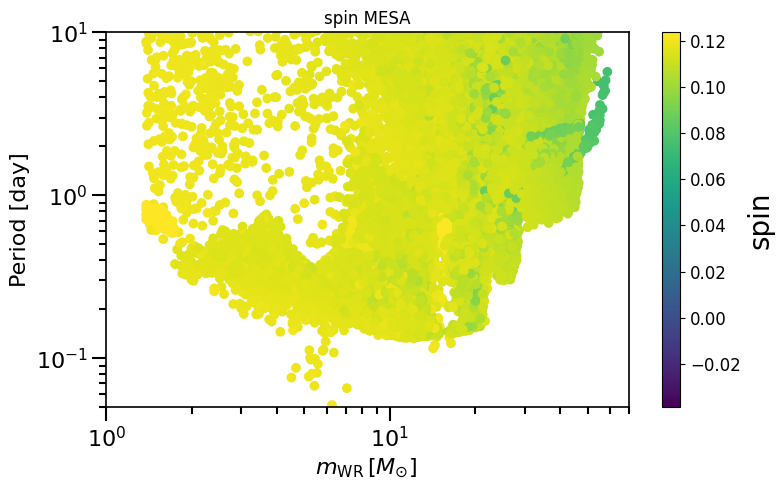

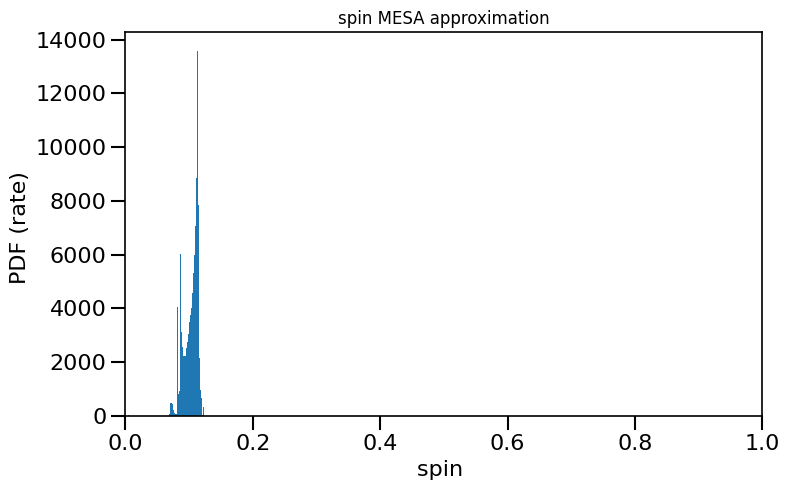

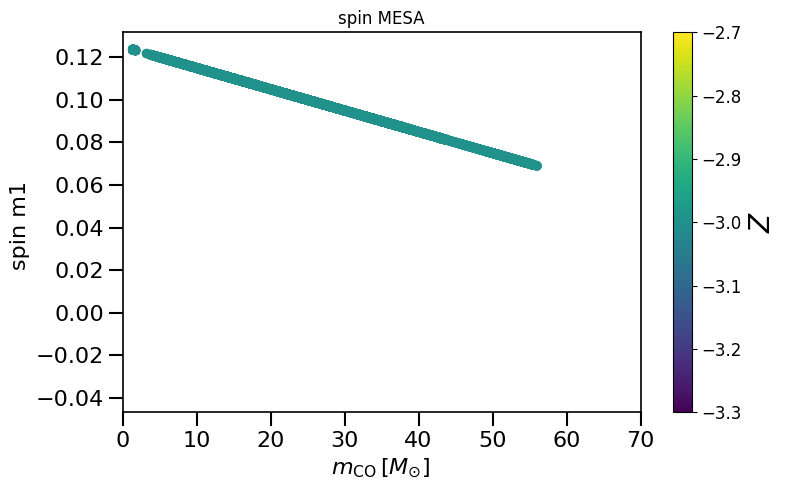

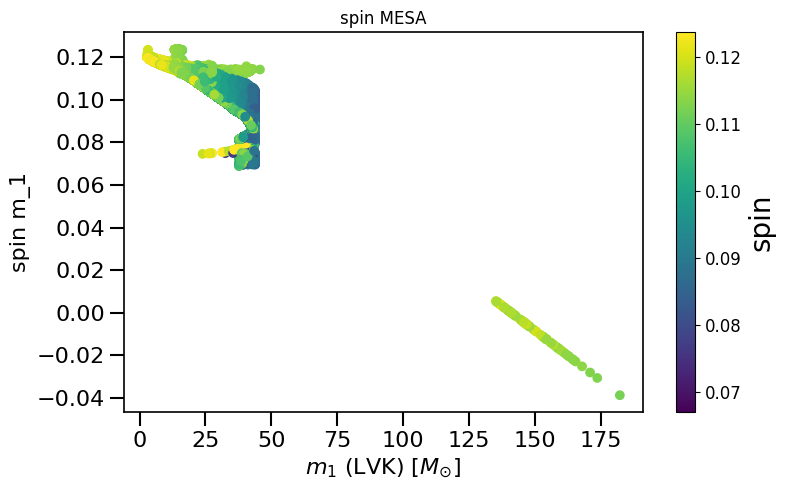

In [9]:
spin = calculate_spin(data_path=path)
spinM1, spinM2  = spin.MESA()


plot_scatter_spin(spin_values=(spinM1), spin_model_name=' MESA')


plot_histogram_spin(spin_values=(spinM1), spin_model_name=' MESA approximation')


plot_scatter_Belczynski_spin(spin_values=(spinM1), spin_model_name=' MESA')


LVKM1 = np.maximum(spin.M1, spin.M2)
plot_scatter_general(xx=LVKM1, yy=spinM1, cc=spinM2, spin_model_name=' MESA', xlabel=r'$m_1$ (LVK) $[M_{\odot}]$', ylabel='spin m_1')



#  -- Extra material --



# 4.) Test of Belczynski prescription 

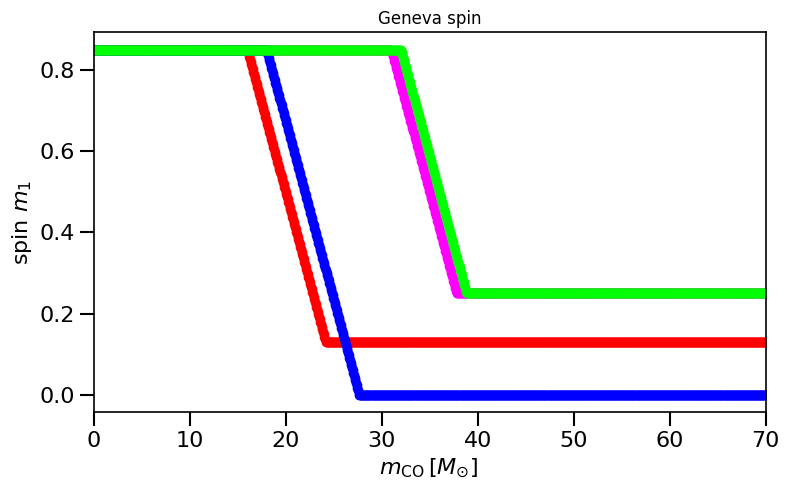

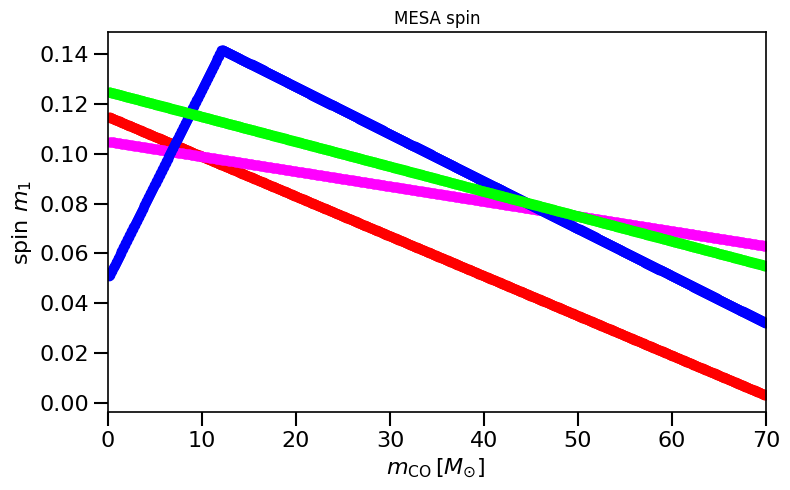

In [10]:
def Z_dependent_spin_param(metallicity_range, prescription_name):
    """ 
    prescription_name in [Geneva, MESA]
    """
    # from Table 1 in http://arxiv.org/abs/2301.01312 


    if metallicity_range >= 0.010:
        return [2.258, 16.0, 24.2, 0.13] if prescription_name=='Geneva' else  [-0.0016, 0.115, np.inf, np.inf, np.inf]

    elif (metallicity_range >= 0.004) & (metallicity_range < 0.010):
        return [3.578, 31.0, 37.8, 0.25] if prescription_name=='Geneva' else  [-0.0006, 0.105, np.inf, np.inf, np.inf]

    elif (metallicity_range >= 0.0012) & (metallicity_range < 0.004):
        return [2.434, 18.0, 27.7, 0.0 ] if prescription_name=='Geneva' else  [0.0076, 0.050, -0.0019, 0.165, 12.09]


    elif (metallicity_range < 0.0012):
        return [3.666, 32.0, 38.8, 0.25] if prescription_name=='Geneva' else  [-0.0010, 0.125, np.inf, np.inf, np.inf]


def Geneva(metallicitySystems, MassCOM1CoreSN, MassCOM2CoreSN):
    # see from Table 1 in http://arxiv.org/abs/2301.01312 

    spinM1, spinM2 = np.zeros_like(MassCOM1CoreSN), np.zeros_like(MassCOM1CoreSN)
    Z_ranges = [[0.0, 0.0012], [0.0012, 0.004], [0.004, 0.010], [0.010, 1.0]] # Tab. 1 conditions in  in http://arxiv.org/abs/2301.01312 


    for _, Z_range in enumerate(Z_ranges):

        mask_inside_Z = (metallicitySystems >= Z_range[0]) & (metallicitySystems < Z_range[1]) # mask inside metallicity range
        
        b_, m1_, m2_, a_low = Z_dependent_spin_param(metallicity_range=Z_range[0], prescription_name='Geneva')

        spinM1[(MassCOM1CoreSN <= m1_)&(mask_inside_Z==1)], spinM2[(MassCOM2CoreSN <= m1_)&(mask_inside_Z==1)] = 0.85, 0.85

        mask_spin1 = (MassCOM1CoreSN > m1_) &  (MassCOM1CoreSN < m2_) & (mask_inside_Z==1)
        mask_spin2 = (MassCOM2CoreSN > m1_) &  (MassCOM2CoreSN < m2_) & (mask_inside_Z==1)
        spinM1[mask_spin1], spinM2[mask_spin2] = (-0.088*MassCOM1CoreSN[mask_spin1]) + b_, (-0.088*MassCOM2CoreSN[mask_spin2]) + b_

        spinM1[(MassCOM1CoreSN >= m2_)&(mask_inside_Z==1)], spinM2[(MassCOM2CoreSN >= m2_)&(mask_inside_Z==1)] = a_low, a_low
    return spinM1, spinM2



def plot_scatter_Belczynski_iteration(ax, spin_values, MassCOM1CoreSN, spin_model_name, color):

    plt.scatter(MassCOM1CoreSN[0:], spin_values[0:], color=color)



    ylabel=r'spin $m_1$'
    xlabel=r'$m_{\rm{CO}} \, [M_{\odot}]$ '

    plt.xlim(0, 70)
#     plt.ylim(-0.1, 1)

    plt.title('spin' + spin_model_name)
    layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel,setMinor=False, fontsize=16)
    f.tight_layout() 

    return ax



def MESA(metallicitySystems, MassCOM1CoreSN, MassCOM2CoreSN):
    '''
    returns spins of the primary (spinM1) and secondary (spinM2) 
    based on the MESA BH natal spin model as described in Belczsynski et al. (2020) 
    See Equation 4 and Fig 2 in https://www.aanda.org/10.1051/0004-6361/201936528 
    this model assumes moderate BH birth spins, with a spin magnitude dependent on metallicity and CO core mass
    Warning: this function currently assumes the two stars have identical metallicity (add a Z mask to change this)
    ''' 
    # MESA spin prescription see from Table 1 in http://arxiv.org/abs/2301.01312 

    # apply spin model on metallicity ranges that linearly span Z values by Belczysnki (cf. http://arxiv.org/abs/2301.01312) 
    Z_ranges = [[0.0, 0.0012], [0.0012, 0.004], [0.004, 0.010], [0.010, 1.0]] # Tab. 1 conditions in  in http://arxiv.org/abs/2301.01312 

    # loop over four metallicity ranges of prescription
    for _, Z_range in enumerate(Z_ranges):
        mask_inside_Z = (metallicitySystems >= Z_range[0]) & (metallicitySystems < Z_range[1])  # mask systems inside metallicity range
        a1_, b1_, a2_, b2_, m1_ = Z_dependent_spin_param(metallicity_range=Z_range[0], prescription_name='MESA')  # obtains metallcity dependent model coefficients 


        ### apply Equation 4 in Belczynski et al. (2020) ###
        # set spins to linear interpolation for CO masses in below m_1 condition:
        mask_spin1 = (MassCOM1CoreSN <= m1_)&(mask_inside_Z==1)
        mask_spin2 = (MassCOM2CoreSN <= m1_)&(mask_inside_Z==1)
        spinM1[mask_spin1], spinM2[mask_spin2] = (a1_*MassCOM1CoreSN[mask_spin1]) + b1_, (a1_*MassCOM2CoreSN[mask_spin2]) + b1_



        if np.isfinite(m1_):
            # set spins to second linear interpolation equation if we are in the Z range where m_1 is not infinite. 
            mask_spin1 = (MassCOM1CoreSN > m1_)&(mask_inside_Z==1)
            mask_spin2 = (MassCOM2CoreSN > m1_)&(mask_inside_Z==1)
            spinM1[mask_spin1], spinM2[mask_spin2] = (a2_*MassCOM1CoreSN[mask_spin1]) + b2_, (a2_*MassCOM2CoreSN[mask_spin2]) + b2_


    return spinM1, spinM2




colors = ['r', 'magenta', 'b', 'lime']

## BELCZYNSKI GENEVA 
# this should reproduce Fig 1 in Belczynski et al. (2020; https://www.aanda.org/10.1051/0004-6361/201936528) if implemented correctly:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(8,5))


for ind, Z_ in enumerate([0.014, 0.006, 0.002, 0.0004]):
    MassCOM1CoreSN = np.linspace(0.1, 70, 1000)
    MassCOM2CoreSN = np.linspace(0.1, 70, 1000)
    metallicitySystems = Z_*np.ones_like(MassCOM1CoreSN)
    spinM1, spinM2 = Geneva(metallicitySystems, MassCOM1CoreSN, MassCOM2CoreSN)
    plot_scatter_Belczynski_iteration(ax, spinM1, MassCOM1CoreSN, ' Geneva', color=colors[ind])
plt.title('Geneva spin')
plt.show()





## BELCZYNSKI MESA
# this should reproduce Fig 2 in Belczynski et al. (2020; https://www.aanda.org/10.1051/0004-6361/201936528) if implemented correctly:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(8,5))



for ind, Z_ in enumerate([0.014, 0.006, 0.002, 0.0004]):
    MassCOM1CoreSN = np.linspace(0.1, 70, 1000)
    MassCOM2CoreSN = np.linspace(0.1, 70, 1000)
    metallicitySystems = Z_*np.ones_like(MassCOM1CoreSN)
    spinM1, spinM2 = MESA(metallicitySystems, MassCOM1CoreSN, MassCOM2CoreSN)
    plot_scatter_Belczynski_iteration(ax, spinM1, MassCOM1CoreSN, ' Geneva', color=colors[ind])
plt.title('MESA spin')
plt.show()





# 5. Spin Class for OLDER COMPAS DATA

To reproduce this, download the data from e.g. Fiducial.zip from Zenodo: https://zenodo.org/record/5178777 (BHNS) or from https://zenodo.org/record/5651073 (BHBH)
when downloaded, change the file directory to point to your datafile with the hdf5 file, and all code should run :)

For this class use the function `class calculate_spin_olderCOMPASdata()` in the spin class python file 

## Example 3: second formed black hole obtains spin through tides at Wolf-Rayet (WR)-BH stage 
Often described as "Bavera+21 prescription" or "Efficient core-envelope coupling presciption", or "Fuller" model

In [11]:
DCOtype='BBH'
path = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_'+ DCOtype +'_A.h5' # change this line! 

spin = calculate_spin_olderCOMPASdata(data_path=path)
spinM1, spinM2  = spin.Bavera21()



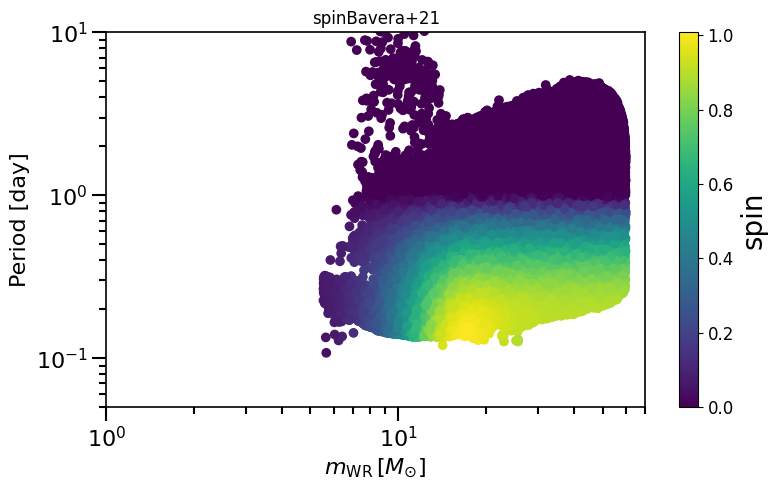

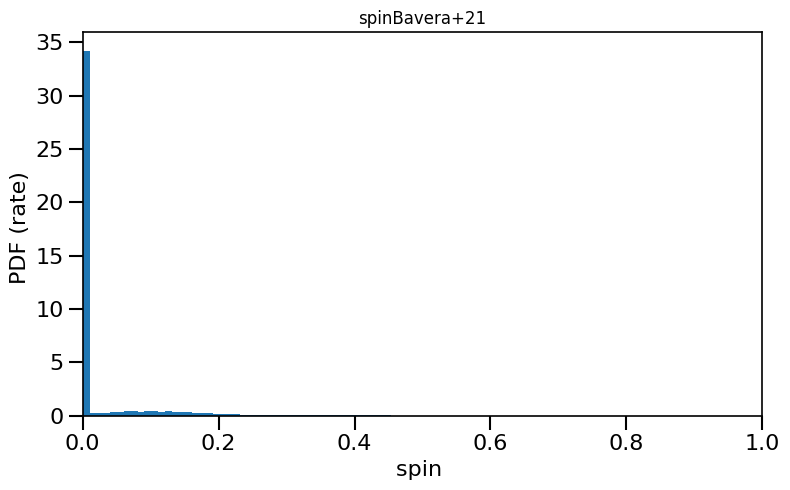

In [12]:

# note that we are plotting both the spinM2 and spinM1, spinM1 can only be nonzero if it went supernova second (due to rejuvenation). This almost never occurs. 
# plot figure showing pre-SN properties 
plot_scatter_spin(spin_values=(spinM1+spinM2), spin_model_name='Bavera+21')

# plot histogram
fdata = h5.File(path)
w_intrinsic = fdata['weights_intrinsic']['w_112'][...].squeeze()
plot_histogram_spin(spin_values=(spinM1+spinM2), spin_model_name='Bavera+21', weights=w_intrinsic)



## Example 4: Geneva model based spin (birth BH spin)
based on Belczynski et al. (2020) Fig.1 and Equation 3.

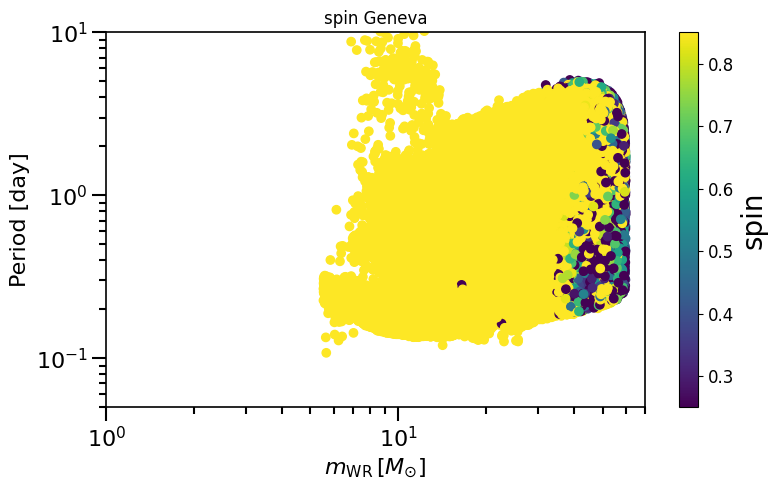

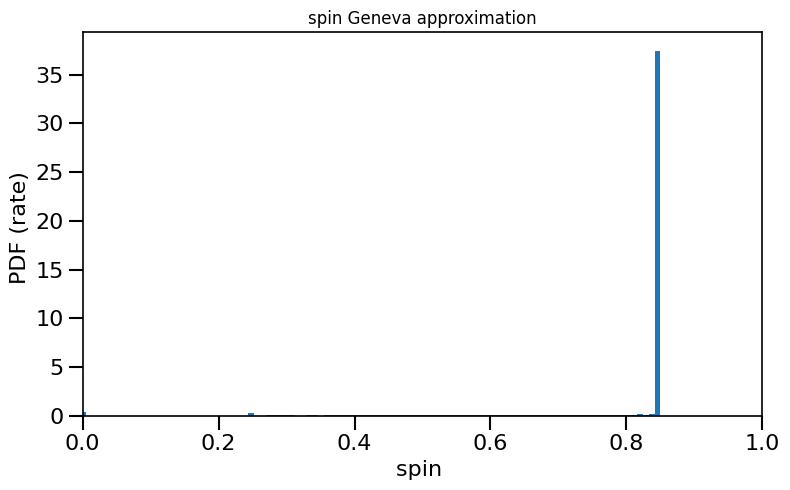

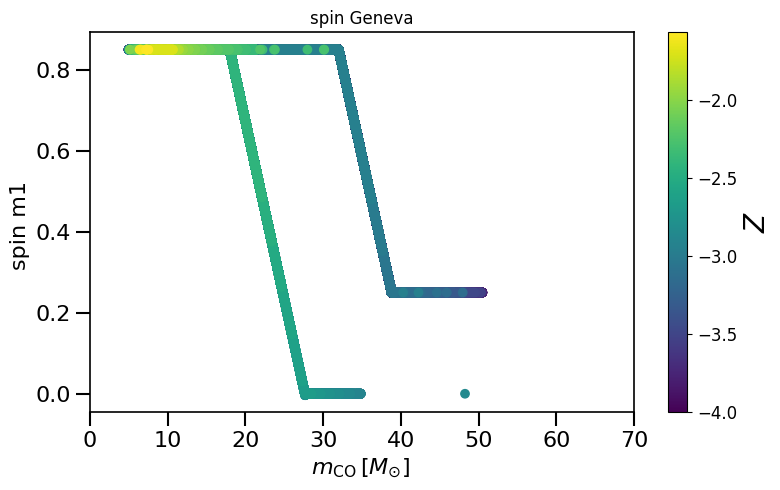

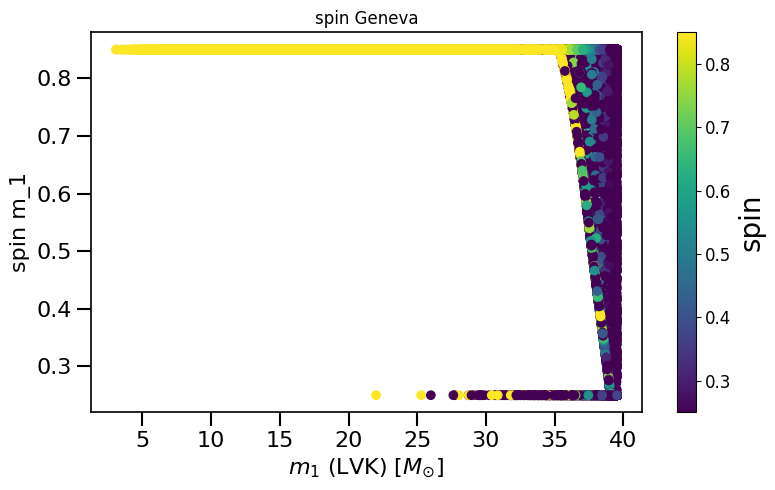

In [13]:
spin = calculate_spin_olderCOMPASdata(data_path=path)
spinM1, spinM2  = spin.Geneva()


plot_scatter_spin(spin_values=(spinM1), spin_model_name=' Geneva')

fdata = h5.File(path)
w_intrinsic = fdata['weights_intrinsic']['w_112'][...].squeeze()

plot_histogram_spin(spin_values=(spinM1), spin_model_name=' Geneva approximation', weights=w_intrinsic)


plot_scatter_Belczynski_spin(spin_values=(spinM1), spin_model_name=' Geneva')



LVKM1 = np.maximum(spin.M1, spin.M2)
plot_scatter_general(xx=LVKM1, yy=spinM1, cc=spinM2, spin_model_name=' Geneva', xlabel=r'$m_1$ (LVK) $[M_{\odot}]$', ylabel='spin m_1')



## Example 5:  MESA-model based birth BH spin 
based on Belczynski et al. (2020) Fig.2 and Equation 4.

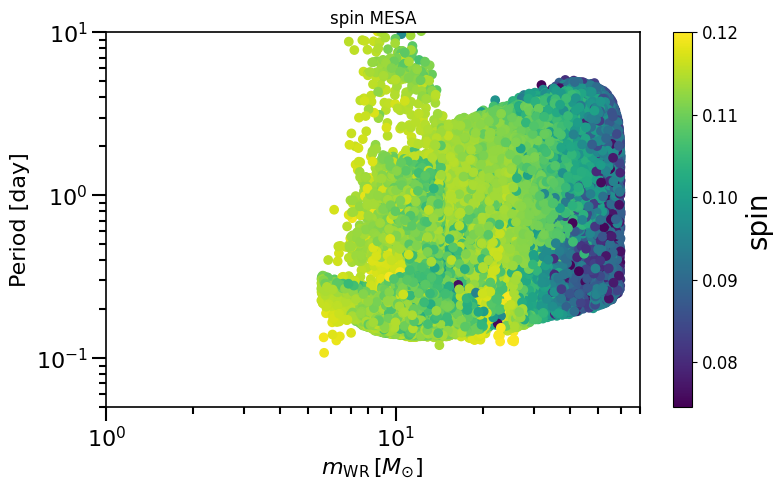

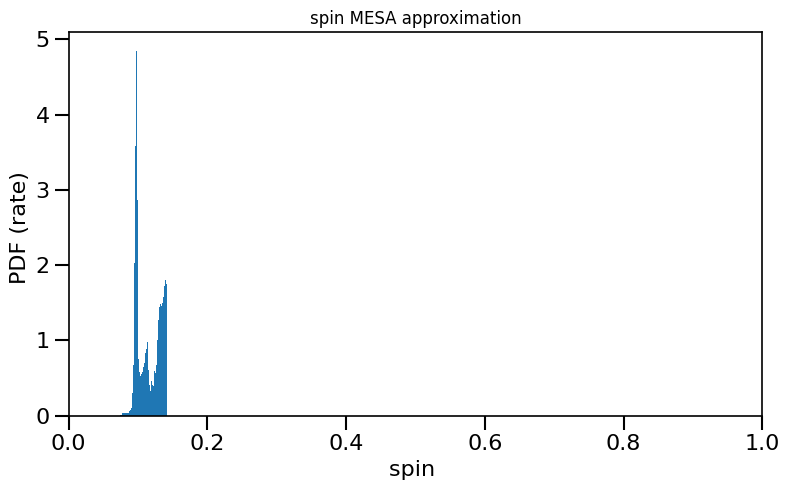

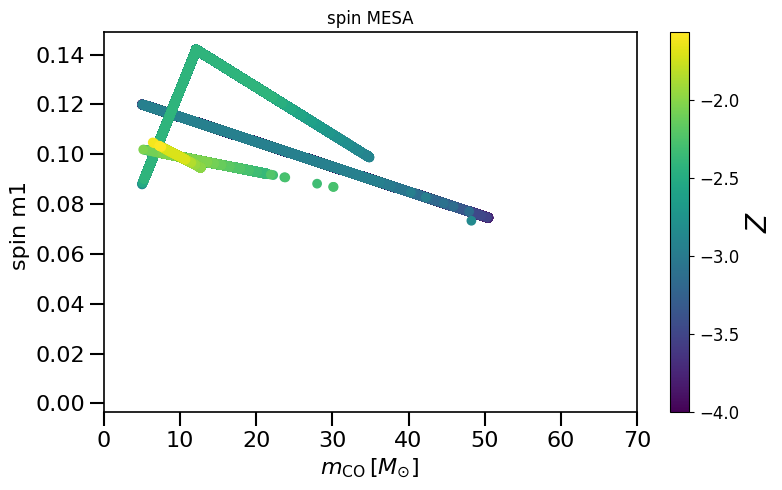

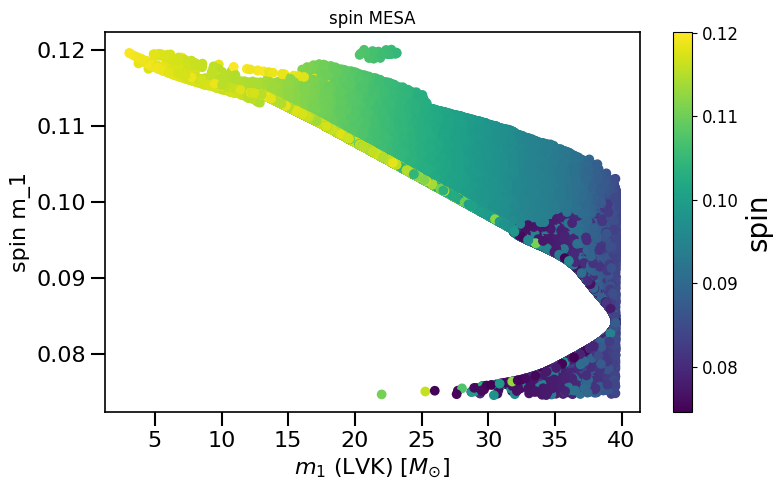

In [14]:
spin = calculate_spin_olderCOMPASdata(data_path=path)
spinM1, spinM2  = spin.MESA()


plot_scatter_spin(spin_values=(spinM1), spin_model_name=' MESA')

fdata = h5.File(path)
w_intrinsic = fdata['weights_intrinsic']['w_112'][...].squeeze()

plot_histogram_spin(spin_values=(spinM1), spin_model_name=' MESA approximation', weights=w_intrinsic)


plot_scatter_Belczynski_spin(spin_values=(spinM1), spin_model_name=' MESA')



LVKM1 = np.maximum(spin.M1, spin.M2)
plot_scatter_general(xx=LVKM1, yy=spinM1, cc=spinM2, spin_model_name=' MESA', xlabel=r'$m_1$ (LVK) $[M_{\odot}]$', ylabel='spin m_1')



# BHNS

## Bavera 

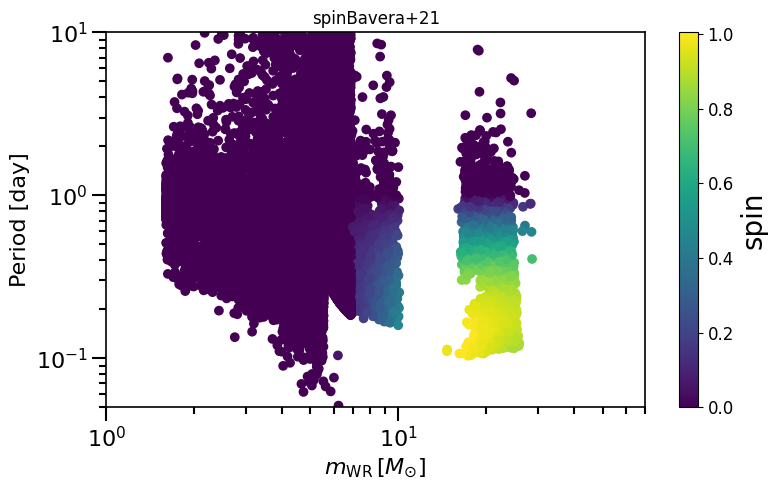

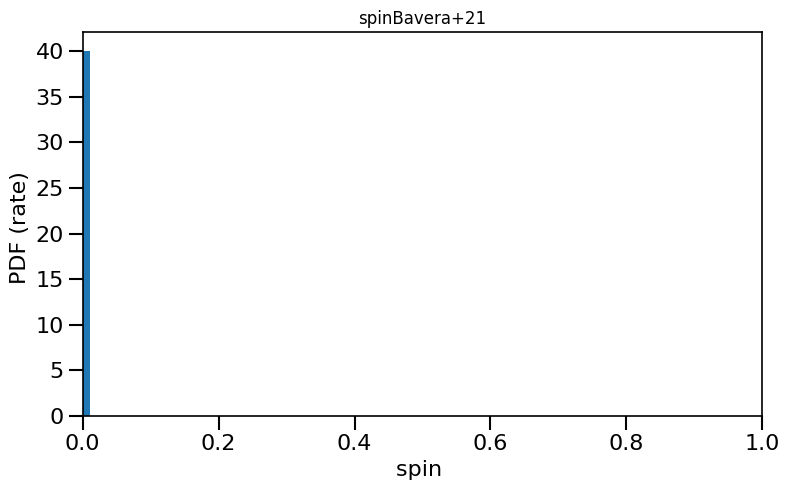

In [15]:
DCOtype='BHNS'
path = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_'+ DCOtype +'_A.h5' # change this line! 

spin = calculate_spin_olderCOMPASdata(data_path=path)
spinM1, spinM2  = spin.Bavera21()


plot_scatter_spin(spin_values=(spinM1+spinM2), spin_model_name='Bavera+21')

fdata = h5.File(path)
w_intrinsic = fdata['weights_intrinsic']['w_112'][...].squeeze()

plot_histogram_spin(spin_values=(spinM1+spinM2), spin_model_name='Bavera+21', weights=w_intrinsic)
